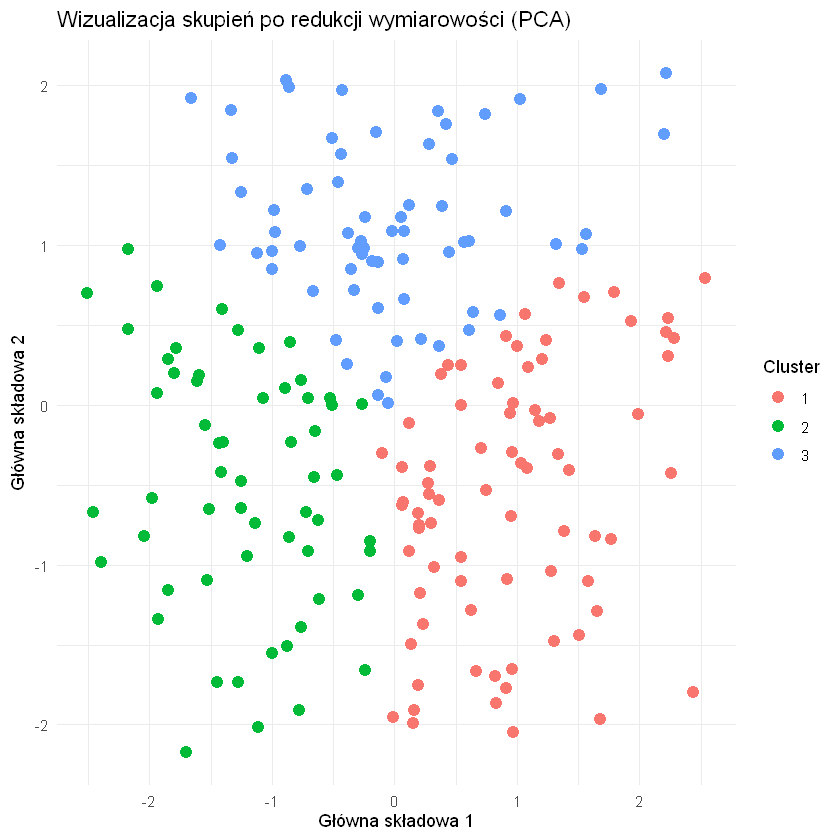

In [2]:
# Ładowanie bibliotek
library(ggplot2)
library(cluster)

# Generowanie przykładowych danych
set.seed(42)
data <- matrix(runif(200 * 5), ncol = 5)

# Standaryzacja danych
data_scaled <- scale(data)

# Redukcja wymiarowości za pomocą PCA
pca <- prcomp(data_scaled, center = TRUE, scale. = TRUE)
data_pca <- pca$x[, 1:2]

# Klasteryzacja k-means (na potrzeby wizualizacji)
kmeans_result <- kmeans(data_pca, centers = 3)

# Wizualizacja wyników
data_plot <- data.frame(PC1 = data_pca[, 1], PC2 = data_pca[, 2], Cluster = factor(kmeans_result$cluster))
ggplot(data_plot, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(size = 3) +
  labs(title = "Wizualizacja skupień po redukcji wymiarowości (PCA)",
       x = "Główna składowa 1",
       y = "Główna składowa 2") +
  theme_minimal()

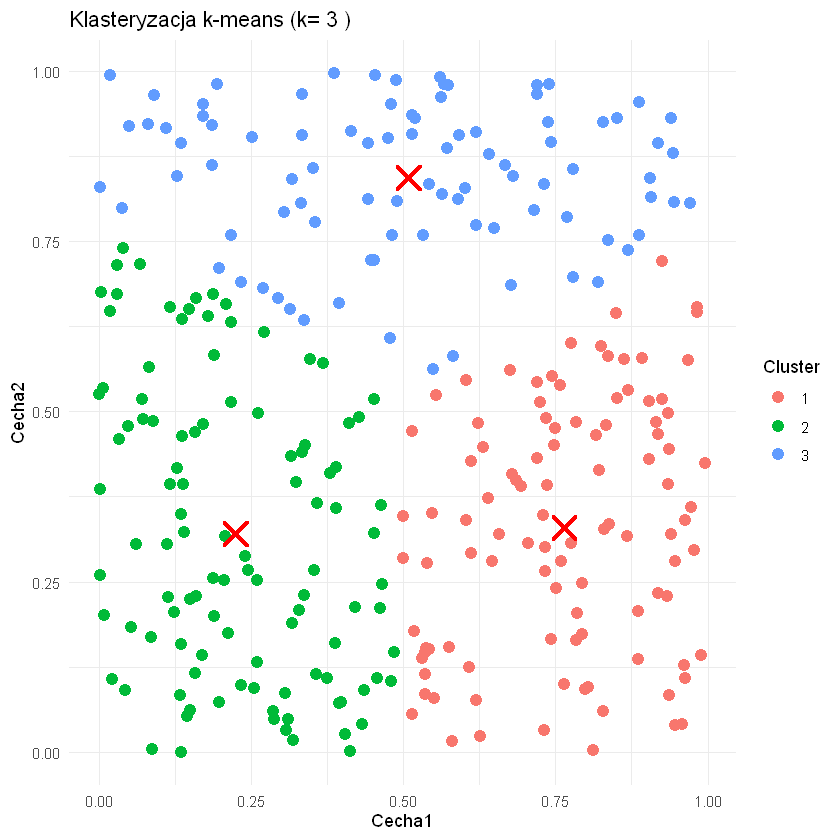

In [3]:
# Ładowanie bibliotek
library(ggplot2)

# Generowanie przykładowych danych
set.seed(42)
data <- data.frame(x = runif(300), y = runif(300))

# Klasteryzacja k-means
k <- 3  # liczba klastrow
kmeans_result <- kmeans(data, centers = k)

# Wizualizacja wynikow
data$Cluster <- as.factor(kmeans_result$cluster)
centers <- as.data.frame(kmeans_result$centers)
colnames(centers) <- c("x", "y")

ggplot(data, aes(x = x, y = y, color = Cluster)) +
  geom_point(size = 3) +
  geom_point(data = centers, aes(x = x, y = y),
             color = 'red', shape = 4, size = 5, stroke = 2) +
  labs(title = paste("Klasteryzacja k-means (k=", k, ")"),
       x = "Cecha1",
       y = "Cecha2") +
  theme_minimal()

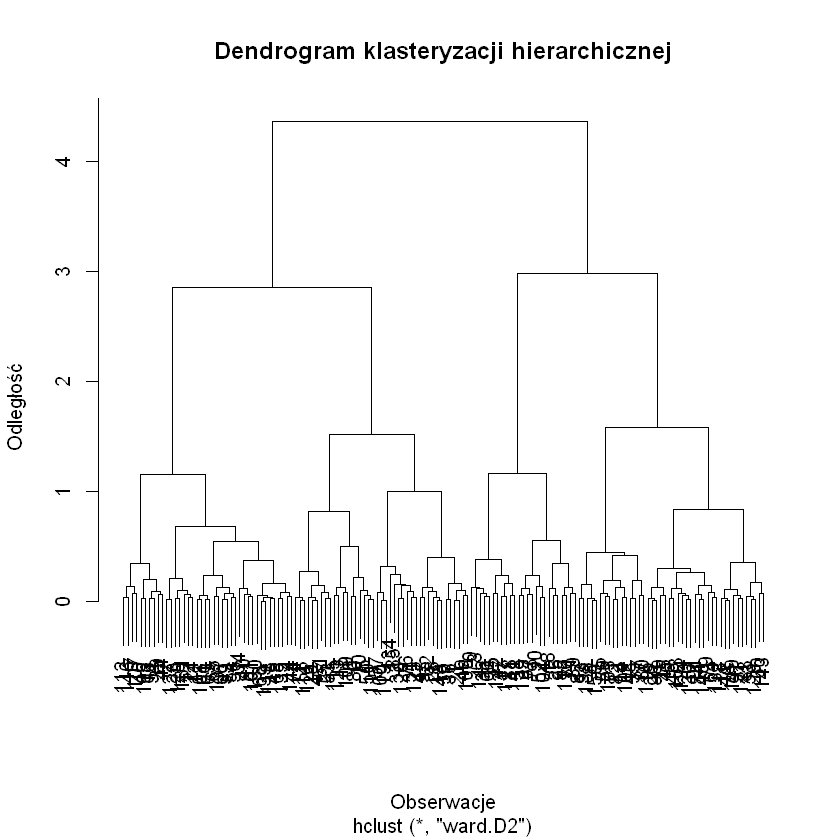

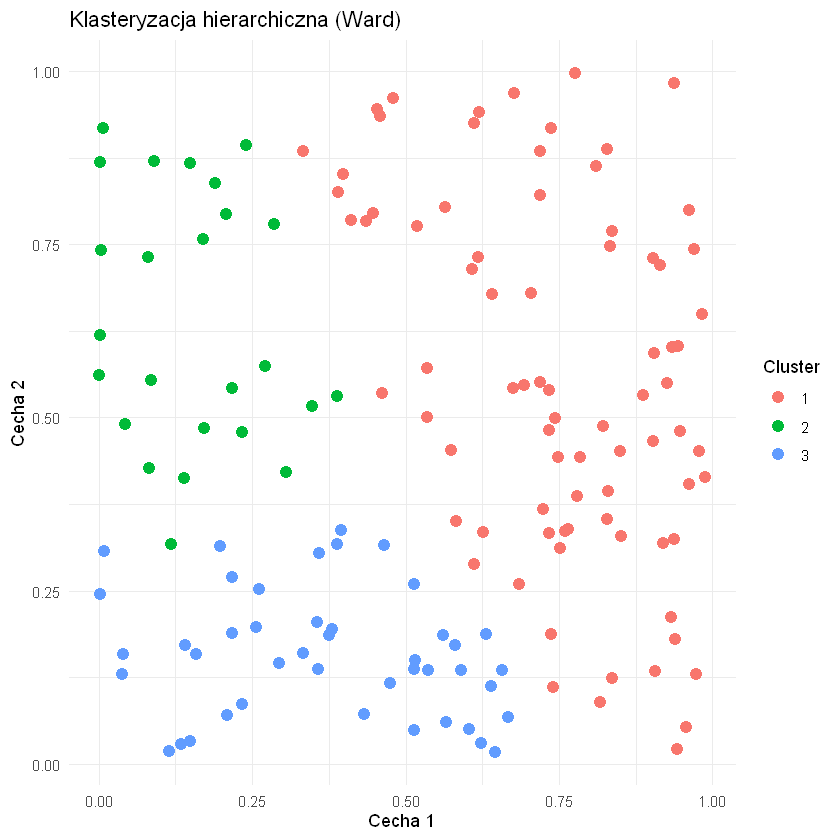

In [4]:
# Ładowanie bibliotek
library(ggplot2)

# Generowanie przykładowych danych
set.seed(42)
data <- data.frame(x = runif(150), y = runif(150))

# Obliczenie macierzy odległości i klasteryzacja hierarchiczna
distance_matrix <- dist(data)
hc <- hclust(distance_matrix, method = "ward.D2")

# Wizualizacja dendrogramu
plot(hc, main = "Dendrogram klasteryzacji hierarchicznej", xlab = "Obserwacje", ylab = "Odległość")

# Wyodrębnienie klastrów
clusters <- cutree(hc, k = 3)
data$Cluster <- as.factor(clusters)

# Wizualizacja skupień
ggplot(data, aes(x = x, y = y, color = Cluster)) +
  geom_point(size = 3) +
  labs(title = "Klasteryzacja hierarchiczna (Ward)",
       x = "Cecha 1",
       y = "Cecha 2") +
  theme_minimal()